<a href="https://colab.research.google.com/github/a-forty-two/diamler_17_jan/blob/main/01_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pandas convert dictionary keys into columns
data = {'age':[1,2,3,4,55,66,77,8,9,91],
        'empid': range(10)}

In [2]:
import pandas as pd
df = pd.DataFrame(data)

In [4]:
df.head(3)

,age,empid
0,1,0
1,2,1
2,3,2


In [5]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [6]:
df.set_index('empid')

,age
empid,
0,1
1,2
2,3
3,4
4,55
5,66
6,77
7,8
8,9


In [7]:
df.head()
# our changes didnt reflect

,age,empid
0,1,0
1,2,1
2,3,2
3,4,3
4,55,4


In [8]:
# Strings, DS- linkedlist and trees, tables, df->always a new dataset is
# created, and old one discarded if there is any edit or change!
df2 = df.set_index('empid')
df2.head()
# new df saved in df2

,age
empid,
0,1
1,2
2,3
3,4
4,55


In [9]:
df.set_index('empid', inplace=True) #inplace-> dont create a new structure,
# change value in existing df

In [10]:
df.head(3)

,age
empid,
0,1
1,2
2,3


In [11]:
# in memory, in disk
# in disk-> file
# in memory-> process 


In [12]:
# ANY CHANGES-> a new DF will be created

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv',header=0 )

In [14]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
data.index

RangeIndex(start=0, stop=569, step=1)

In [16]:
data.shape
# 569 rows and 33 columns 

(569, 33)

In [17]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [18]:
# Correlation Test 
# Measure of how well are 2 features inclined to each other
# how much are they dependent on each other

# Correlation-> SIGN (+ or -) and a Magnitude (-1 to +1)
# 3 types: f1 is directly proportional to f2-> POSITIVE CORRELATION (+)
# 3 types: f1 is inversely proportional to f2-> NEGATIVE CORRELATION (-)
# 3 types: f1 has no relation to f2-> Zero CORRELATION

In [19]:
# just to visually understand our output we will take 10 cols instead of all
cols_to_select = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# column selection in two ways:
# by name
# or by index


In [20]:
# .loc -> by location-> [rowfilters, col_names]
df = data.loc[: , cols_to_select ]
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


In [21]:
corrs = df.corr()

In [22]:
corrs

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


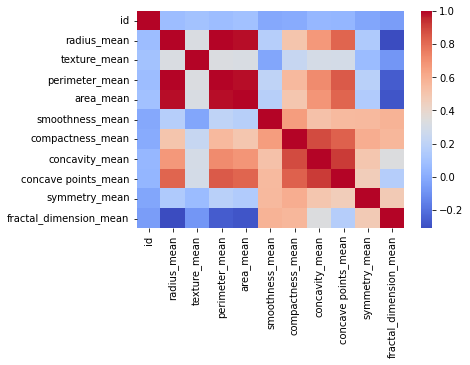

In [24]:
import seaborn as sns
sns.heatmap(corrs, cmap='coolwarm') # coolwarm-> blue and red color

In [25]:
df = df.set_index('id')

In [27]:
df.tail(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884


In [32]:
diagnosis = df.loc[:,'diagnosis']
encoding_logic = lambda val: 'red' if val=='M' else 'blue'
diagnosis_encoded = diagnosis.map(encoding_logic) # logic will be applied to EVERY element of diagnosis
inputs = data.loc[:,['id','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] ]

<Figure size 432x288 with 0 Axes>

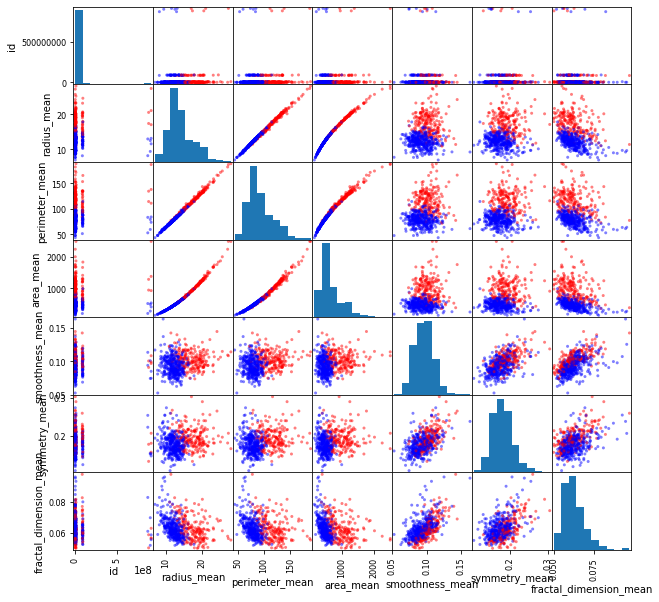

In [34]:
import matplotlib.pyplot as plt
inputs_small = data.loc[:,['id','radius_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'symmetry_mean','fractal_dimension_mean'] ]

plt.figure() # CLEAN the graph buffer before writing anything into it 
sm = pd.plotting.scatter_matrix(inputs_small, c=diagnosis_encoded, figsize=(10,10))